In [65]:
import pandas as pd
import numpy as np
from sklearn import linear_model

df=pd.read_csv("Housing.csv")
df


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [14]:
df ['mainroad']=df['mainroad'].astype('category')
df ['mainroad']=df['mainroad'].cat.codes

df ['guestroom']=df['guestroom'].astype('category')
df ['guestroom']=df['guestroom'].cat.codes

df ['basement']=df['basement'].astype('category')
df ['basement']=df['basement'].cat.codes

df ['hotwaterheating']=df['hotwaterheating'].astype('category')
df ['hotwaterheating']=df['hotwaterheating'].cat.codes

df ['airconditioning']=df['airconditioning'].astype('category')
df ['airconditioning']=df['airconditioning'].cat.codes

df ['prefarea']=df['prefarea'].astype('category')
df ['prefarea']=df['prefarea'].cat.codes

df ['furnishingstatus']=df['furnishingstatus'].astype('category')
df ['furnishingstatus']=df['furnishingstatus'].cat.codes



df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [15]:
df.isnull().sum() #  just checking if any data set has null value

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [53]:
x=df.drop(columns='price')
y=df['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

c=lr.intercept_
m=lr.coef_
print(" c is:",c)
print("m are :",m)

 c is: 107133.47334964015
m are : [ 2.48857876e+02  1.34994406e+05  9.50583380e+05  4.18321569e+05
  4.66890751e+05  3.68497644e+05  3.59364424e+05  1.24665331e+06
  8.97037026e+05  2.23301809e+05  6.96754525e+05 -2.30222653e+05]


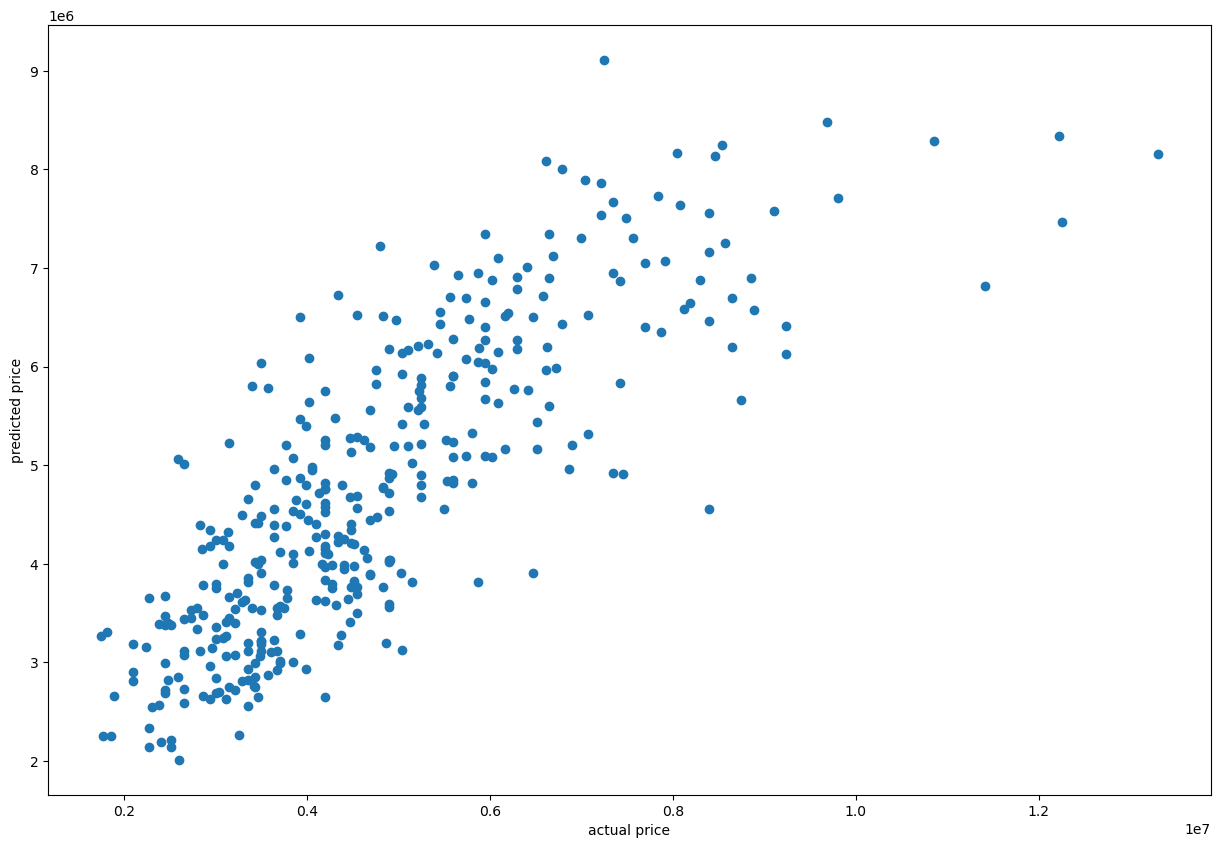

In [64]:
y_train_pred=lr.predict(x_train)
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_train,y_train_pred)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.show()


In [55]:
from sklearn.metrics import r2_score
r2_score(y_train,y_train_pred)

0.6575703217254214